<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod2_lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/files/dsbc.py
from dsbc import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date

pd.options.display.float_format = "{:,.2f}".format
dados = pd.read_csv("https://github.com/willianrocha/bootcamp-datascience-alura/raw/main/files/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6
ordenado_por_total.index = ordenado_por_total.index.str[3:]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
df_pop_por_uf = pd.read_html(url)
df_pop_por_uf = df_pop_por_uf[0]

gastos_e_populacao_recente = clean_n_join(df_pop_por_uf, gastos_do_mais_recente)
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 10**6
gastos_e_populacao_recente["gastos_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
mensal = ordenado_por_total.T



mensal.index = mensal.index.map(para_dia)
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]

--2021-06-04 16:53:15--  https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/files/dsbc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1350 (1.3K) [text/plain]
Saving to: ‘dsbc.py.1’

dsbc.py.1           100%[===================>]   1.32K  --.-KB/s    in 0s      

2021-06-04 16:53:15 (87.4 MB/s) - ‘dsbc.py.1’ saved [1350/1350]



In [9]:
mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype('datetime64')
mensal_aberto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dia_mes_ano  4050 non-null   datetime64[ns]
 1   uf           4050 non-null   object        
 2   gasto        4050 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 95.0+ KB


In [12]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


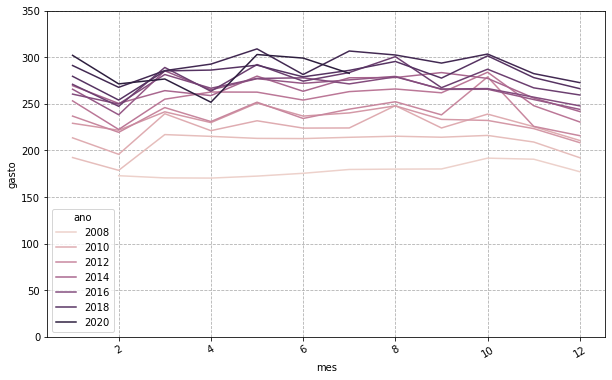

In [20]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x="mes", y="gasto", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(True, linestyle="--")
plt.show()

In [26]:
from calendar import monthrange
mensal_aberto['gasto_diario'] = mensal_aberto.apply(lambda x: monthrange(x['ano'], x['mes'])[1], axis=1)
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['gasto_diario']
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,5.96
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


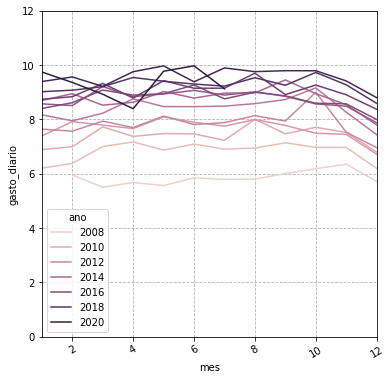

In [39]:
plt.figure(figsize=(6,6))
ax = sns.lineplot(data=mensal_aberto.query("uf in 'São Paulo'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 12)
plt.xlim(1, 12)
plt.grid(True, linestyle="--")
plt.show()

# Desafios

## Desafio 01: Melhorar o gráfico ano a ano:

Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

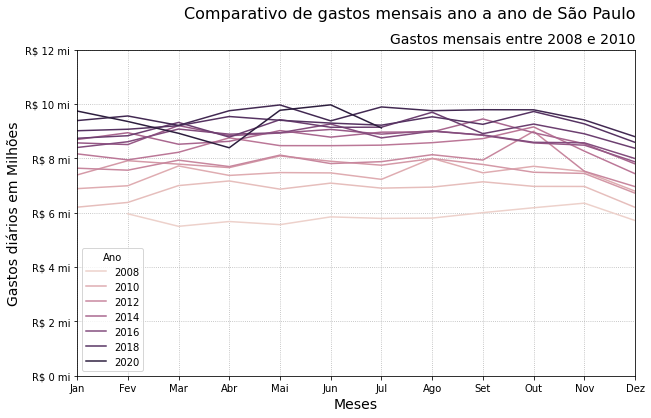

In [52]:
fig = plt.figure(figsize=(10,6))
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
selected_states = mensal_aberto.query("uf in 'São Paulo'")
ax = sns.lineplot(data=selected_states, x="mes", y="gasto_diario", hue="ano")
leg = ax.get_legend()
leg.set_title("Ano")
plt.title("Gastos mensais entre 2008 e 2020", fontsize = 14, loc="right")
plt.suptitle("Comparativo de gastos mensais ano a ano de São Paulo", fontsize = 16, ha='right', x=fig.subplotpars.right)
# ax.legend(loc='upper left')
ax.set_xlabel("Meses", fontsize = 14)
ax.set_ylabel("Gastos diários em Milhões", fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f} mi"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.set_xticklabels(meses)
# plt.xticks(rotation=0)
plt.ylim(0, 12)
plt.xlim(1, 12)
plt.grid(True, linestyle=":")
plt.show()

## Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

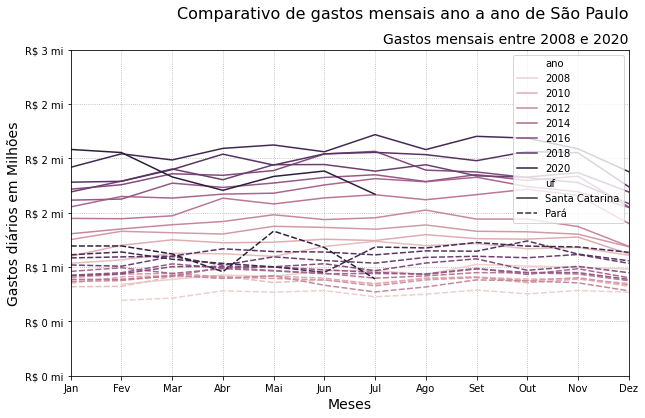

In [65]:
fig = plt.figure(figsize=(10,6))
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
selected_states = mensal_aberto.query("uf in ('Santa Catarina', 'Pará')")
ax = sns.lineplot(data=selected_states, x="mes", y="gasto_diario", hue="ano", style="uf")
leg = ax.get_legend()
plt.title("Gastos mensais entre 2008 e 2020", fontsize = 14, loc="right")
plt.suptitle("Comparativo de gastos mensais ano a ano de São Paulo", fontsize = 16, ha='right', x=fig.subplotpars.right)
ax.legend(loc='best')
ax.set_xlabel("Meses", fontsize = 14)
ax.set_ylabel("Gastos diários em Milhões", fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f} mi"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.set_xticklabels(meses)
# plt.xticks(rotation=0)
plt.ylim(0, 3)
plt.xlim(1, 12)
plt.grid(True, linestyle=":")
plt.show()

Santa Catarina aprenseta um movimento de subida no mês de julho, aproximadamente meio do inverno. Isso pode levar ao aumento de casos de gripe sazonal.

Enquanto que o Pará, tem um leve aumento em Setembro, um dos meses finais do "verão amazônico". Com o verão, intensifica-se os casos de dengue.